# Practice Session Logistic Regression 

## 1.Synthetic data

In [1]:
from utility_bayes import gen_data_twogaussians_2d
import numpy as np
# class 1
n1 = 100
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])
# class 2
n2 = n1
mu2 = np.array([-2, -2]); S2 = 3.5*np.array([[1, -0.25], [-0.25, 1/2]])
X_train, Y_train = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

In [2]:
from sklearn import linear_model

# define the model
clf_reglog = linear_model.LogisticRegression(penalty="none", solver="newton-cg")
# fit the parameters
clf_reglog.fit(X_train, Y_train)

LogisticRegression(penalty='none', solver='newton-cg')

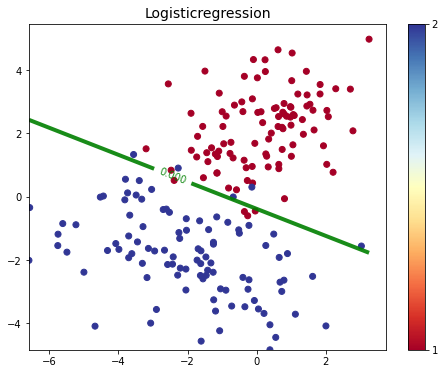

In [3]:
from utility_bayes import plot_decision_regions_2d
import matplotlib.pyplot as plt

plot_decision_regions_2d(X_train, Y_train, clf_reglog, resolution=0.02, title="Logisticregression")

## 2. Spam Classification 

In [4]:
#1
import numpy as np
dataspam = np.loadtxt("spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]
# get the inputs
X = dataspam[:,0:57]
# extract the output
Y = dataspam[:,-1]

In [5]:
#2

import pandas as pd

sample_nb = pd.value_counts(Y)
sample_nb

0.0    2788
1.0    1813
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1433edda10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1433ee62d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1433edd610>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1433ee6b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1433ee6fd0>,
 'means': []}

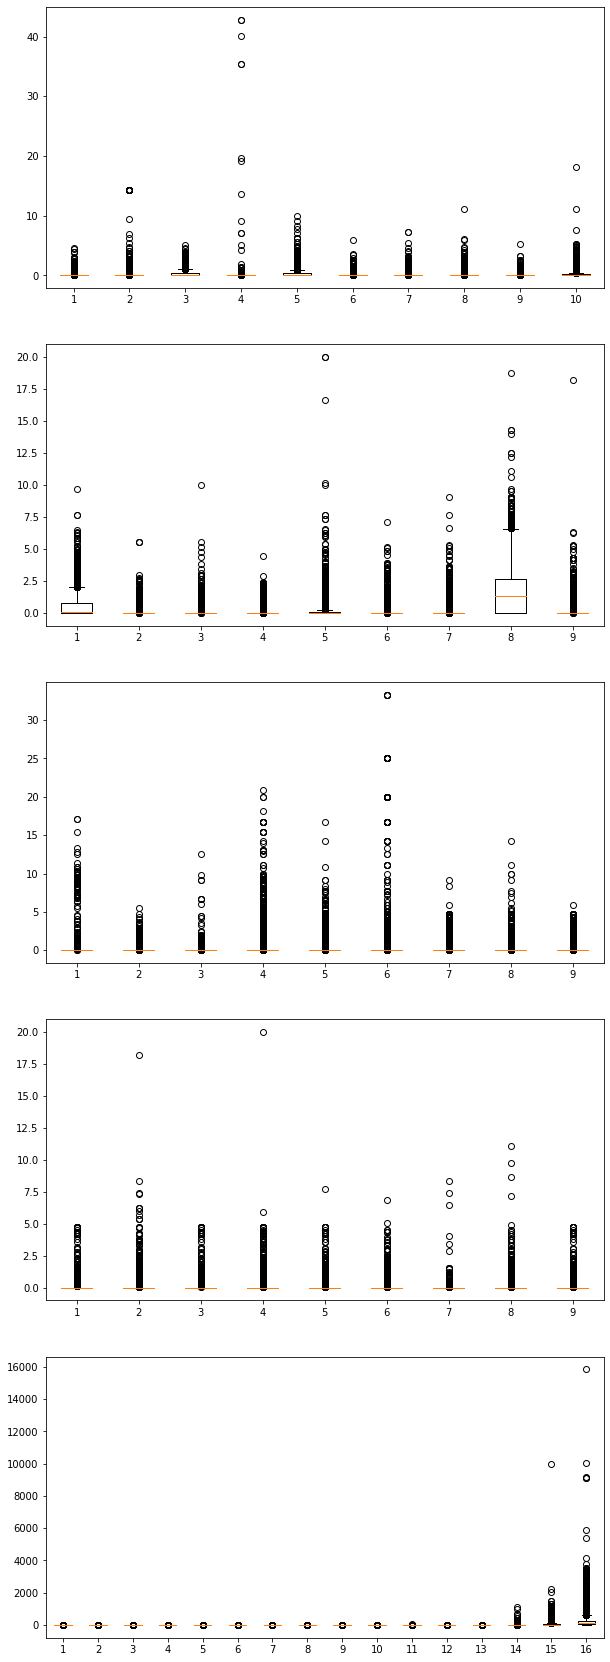

In [6]:
plt.figure(figsize = (10,30))
plt.subplot(5,1,1)
plt.boxplot(X[:,0:10])

plt.subplot(5,1,2)
plt.boxplot(X[:,11:20])

plt.subplot(5,1,3)
plt.boxplot(X[:,21:30])

plt.subplot(5,1,4)
plt.boxplot(X[:,31:40])

plt.subplot(5,1,5)
plt.boxplot(X[:,41:57])

All the data is between 0 and 40. Just the last 3 variable are way higher. It's because they count the average lenght, the longest length and the sum of the length of uninterrupted sequence of capital letters. 

In [7]:
#3
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)

In [8]:
#4 
clf_spam = linear_model.LogisticRegression(penalty="l2", solver="newton-cg")
# fit the parameters
clf_spam.fit(X_train, Y_train)


LogisticRegression(solver='newton-cg')

In [9]:
from sklearn.metrics import accuracy_score

# training set
pred_log = clf_spam.predict(X_train)
acc_train = accuracy_score(pred_log, Y_train)
print("Accuracy on training data = {}".format(100*acc_train))


# test set
pred_log = clf_spam.predict(X_test)
acc_test = accuracy_score(pred_log, Y_test)
print("Accuracy on test data = {}".format(100*acc_test))

Accuracy on training data = 92.66384088686013
Accuracy on test data = 91.91655801825294


In [10]:
# sort in ascending order
index = np.argsort(np.abs(np.squeeze(clf_spam.coef_)))
# reverse the order
index = index[::-1]
print("{:<38s}{:<18s}".format("Variables", "Coefficient"))
for var, coef in zip(features_name[index], clf_spam.coef_[0,index]):
    print("{:<28s}{:>16.2f}".format(var, coef))

Variables                             Coefficient       
char_freq_$                             3.57
word_freq_george                       -3.39
word_freq_remove                        2.20
word_freq_000                           2.01
word_freq_conference                   -1.48
word_freq_meeting                      -1.43
word_freq_hp                           -1.41
word_freq_cs                           -1.41
word_freq_project                      -1.38
word_freq_labs                         -1.29
word_freq_free                          1.26
word_freq_edu                          -1.17
word_freq_original                     -1.17
word_freq_lab                          -1.14
char_freq_sharp                         1.13
word_freq_over                          1.13
word_freq_credit                        1.09
word_freq_addresses                     1.04
word_freq_3d                            1.04
char_freq_;                            -1.01
word_freq_table                        -0.9

The test most important features are word_freq_george               char_freq_$ , 
word_freq_000,
word_freq_remove,
word_freq_edu,
word_freq_meeting,
word_freq_hp ,
word_freq_85,
word_freq_conference,
word_freq_cs           

In [11]:
#5

# centering and scaling
from sklearn.preprocessing import StandardScaler
# define the scaler
sc = StandardScaler(with_mean=True, with_std=True)

# set the parameters of the scaler using training data
sc = sc.fit(X_train)

# apply the so set scaler to normalize the data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#6

dataspam = np.loadtxt("spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]
# get the inputs
X = dataspam[:,0:57]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)


# log transform the features
epsilon = 0.01

X_train_n = np.log(X_train + epsilon)
X_test_n = np.log(X_test + epsilon)

In [13]:
clf_spam = linear_model.LogisticRegression(penalty="l2", solver="newton-cg")
# fit the parameters
clf_spam.fit(X_train_n, Y_train)


LogisticRegression(solver='newton-cg')

In [14]:
# training set
pred_log = clf_spam.predict(X_train_n)
acc_train = accuracy_score(pred_log, Y_train)
print("Accuracy on training data = {}".format(100*acc_train))


# test set
pred_log = clf_spam.predict(X_test_n)
acc_test = accuracy_score(pred_log, Y_test)
print("Accuracy on test data = {}".format(100*acc_test))

Accuracy on training data = 95.17443756113467
Accuracy on test data = 93.35071707953064


The performance is improved because ??

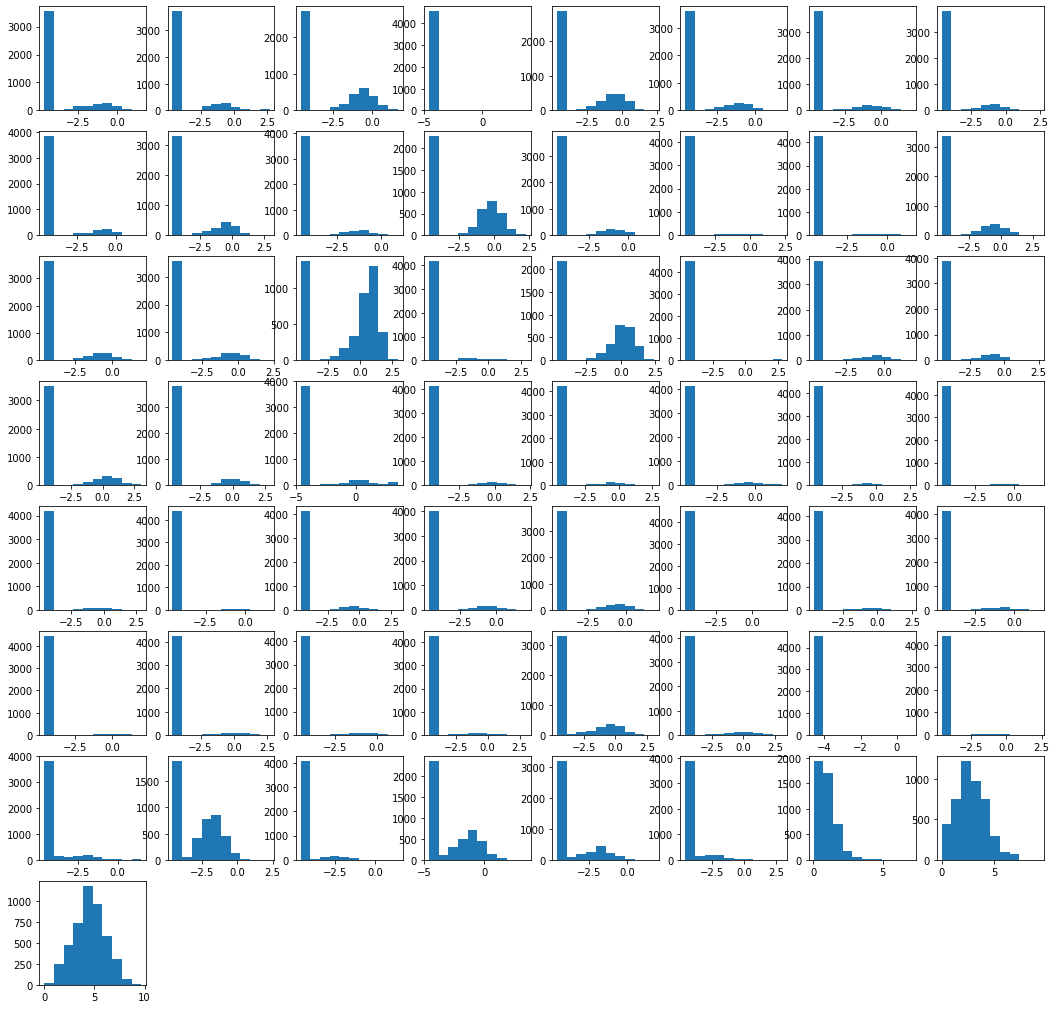

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
vartype = "log" # apply the transform or not
for i in range(X.shape[1]):
    plt.subplot(8,8,i+1)
    if vartype=="log":
        plt.hist(np.log(X[:,i]+epsilon))
    else:
        plt.hist(X[:,i])
        plt.xticks(fontsize=5); plt.yticks(fontsize=6);


Without the log with can't see the normal distribution of the histogram. Therefore it improved. 

# Bonus : digits classification 

In [16]:
# load the datasets 

import numpy as np


# training set
mnist_train = np.loadtxt("mnist-app.csv", delimiter=",")
Y_train = mnist_train[:,-1]
X_train = mnist_train[:, 0:784]
# test set
mnist_test = np.loadtxt("mnist-test.csv", delimiter=",")
Y_test = mnist_test[:,-1]
X_test = mnist_test[:, 0:784]

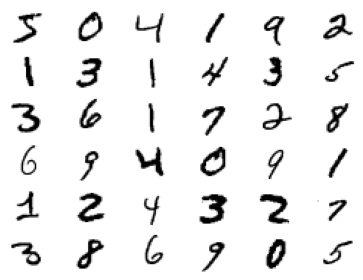

In [17]:
#visualize some of the digits 

import matplotlib.pyplot as plt
fig, ax_array = plt.subplots(6, 6)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray_r")
    plt.setp(axes, xticks=[], yticks=[], frame_on=False)
    plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [18]:
# perfrom a classification by the logistic regression method trained with a l2 penalty and C =1

from sklearn import linear_model
clf = linear_model.LogisticRegression(tol=1e-2, multi_class="multinomial", solver="lbfgs",C=1,
max_iter=2500)

In [19]:
clf.fit(X_train, Y_train)

# My computer is not powerful enough to complete the computation. 
# It runs and eventually crash 

KeyboardInterrupt: 

In [ ]:

# I can't run this cell since I can't do the other one. 
# The link of the subject is broken, so I can not see the comparaison.


# training set
pred_log = clf_spam.predict(X_train)
acc_train = accuracy_score(pred_log, Y_train)
print("Accuracy on training data = {}".format(100*acc_train))


# test set
pred_log = clf_spam.predict(X_test)
acc_test = accuracy_score(pred_log, Y_test)
print("Accuracy on test data = {}".format(100*acc_test))
